### Задание

Самостоятельно напишите нейронную сеть, которая может стать составной частью системы бота для игры в "Крестики-нолики". Используя подготовленную базу изображений, создайте и обучите нейронную сеть, распознающую две категории изображений: крестики и нолики. Добейтесь точности распознавания более 95% (accuracy)


In [2]:
from tensorflow.keras.models import Sequential # Подключение класса для создания нейронной сети прямого распространения

from tensorflow.keras.layers import Dense # Подключение класса для создания полносвязного слоя

from tensorflow.keras.optimizers import Adam # Подключение оптимизатора

from tensorflow.keras import utils # Подключение утилит для подготовки данных

from tensorflow.keras.preprocessing import image # Подключение библиотеки для загрузки изображений

import numpy as np # Подключение библиотеки для работы с массивами

import os # Подключение модуля для работы с файлами

import matplotlib.pyplot as plt # Подключение библиотек для отрисовки изображений
from PIL import Image 

from tensorflow.keras.datasets import mnist     # Библиотека с базой рукописных цифр

# Отрисовка изображений в ячейках ноутбука
%matplotlib inline 

import gdown # Загрузка датасета из облака
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l3/hw_pro.zip', None, quiet=True)

!unzip -q hw_pro.zip # Распаковываем архив hw_light.zip в папку hw_light

'hw_pro.zip'

In [38]:
base_dir = '/content/hw_pro' # Путь к директории с базой

x_train = [] # Создание пустого списка для загрузки изображений обучающей выборки

y_train = [] # Создание списка для меток классов

img_height = 20 # Задание высоты и ширины загружаемых изображений
img_width = 20

for patch in os.listdir(base_dir): # Перебор папок в директории базы
    
    for img in os.listdir(base_dir + '/' + patch): # Перебор файлов в папках
        
        x_train.append(image.img_to_array(image.load_img(base_dir + '/' + patch + '/' + img, # Добавление в список изображений текущей картинки
                                                         target_size=(img_height, img_width),
                                                         color_mode='grayscale'))[:,:,0])
        
        if patch == '0': # Добавление в массив меток, соответствующих классам
            y_train.append(0)
        else:
            y_train.append(1)

CLASS_COUNT = 2

x_train = np.array(x_train) # Преобразование в numpy-массив загруженных изображений и меток классов
y_train = np.array(y_train)

x_train = x_train.reshape(x_train.shape[0], -1)   
# x_test = x_test_org.reshape(x_test_org.shape[0], -1)
x_train = x_train.astype('float32') / 255.
y_train = utils.to_categorical(y_train, CLASS_COUNT)

print('Размер массива x_train', x_train.shape) # Вывод размерностей - количество изображений, размер в пикселях
print('Размер массива y_train', y_train.shape)


Размер массива x_train (102, 400)
Размер массива y_train (102, 2)


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 300)               120300    
                                                                 
 dense_38 (Dense)            (None, 200)               60200     
                                                                 
 dense_39 (Dense)            (None, 100)               20100     
                                                                 
 dense_40 (Dense)            (None, 2)                 202       
                                                                 
Total params: 200,802
Trainable params: 200,802
Non-trainable params: 0
_________________________________________________________________


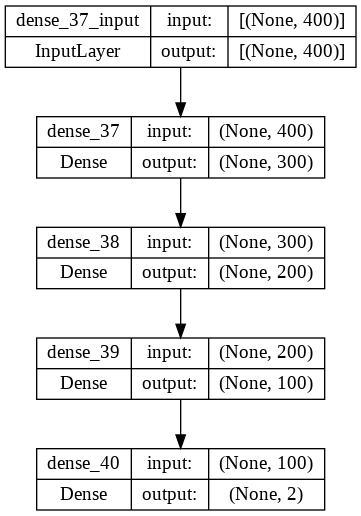

In [49]:
# Задание константы количества распознаваемых классов

model = Sequential() # создаем сеть

model.add(Dense(300, input_dim=400, activation='relu')) # создаем первый линейный слой из 10 нейронов и настраиваем сеть на вход из 400 чисел
model.add(Dense(200, activation='relu')) # второй слой
model.add(Dense(100, activation='relu')) # второй слой
model.add(Dense(CLASS_COUNT, activation='softmax')) # третий лой с количеством нейронов по числу классов с softmax-активацией

model.summary()
utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True) # hисуеv наглядную схему (граф) нейронной сети


In [50]:
# компилируем и обучаем модель
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # назначаем функцию ошибки, оптимизатор и метрики

# передаем данные для обучения, сколько изображение до изменения весов, сколько циклов обучения, с визуализацией
model.fit(x_train, y_train, batch_size=51, epochs=10, verbose=1) 


Epoch 1/10
2/2 [==============================] - 0s 8ms/step - loss: 0.9227 - accuracy: 0.5000
Epoch 2/10
2/2 [==============================] - 0s 7ms/step - loss: 0.6076 - accuracy: 0.6863
Epoch 3/10
2/2 [==============================] - 0s 6ms/step - loss: 0.5863 - accuracy: 0.6569
Epoch 4/10
2/2 [==============================] - 0s 7ms/step - loss: 0.5256 - accuracy: 0.7059
Epoch 5/10
2/2 [==============================] - 0s 6ms/step - loss: 0.4804 - accuracy: 0.8039
Epoch 6/10
2/2 [==============================] - 0s 7ms/step - loss: 0.3961 - accuracy: 0.9608
Epoch 7/10
2/2 [==============================] - 0s 7ms/step - loss: 0.3403 - accuracy: 0.9706
Epoch 8/10
2/2 [==============================] - 0s 6ms/step - loss: 0.2637 - accuracy: 0.9804
Epoch 9/10
2/2 [==============================] - 0s 7ms/step - loss: 0.2101 - accuracy: 0.9804
Epoch 10/10
2/2 [==============================] - 0s 6ms/step - loss: 0.1827 - accuracy: 1.0000
